# **Projet 5 - <span style="color:#0B28D0">Segmentez les clients d'un site e-commerce</span>**
---

**<span style="color:#0B28D0">Objectif de la mission:</span>**
* Fournir une **segmentation des clients** afin d'apporter des informations supplémentaires aux équipes pour leurs campagnes de communication.
* **Comprendre les différents types d’utilisateurs** grâce à leur comportement et à leurs données personnelles.
* Fournir une **description actionable de la segmentation** et de sa logique sous-jacente pour une utilisation optimale.
* Proposition de **contrat de maintenance basée sur une analyse de la stabilité** des segments au cours du temps..

## **0. Importation des librairies et des données**
---

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# ---
import geopandas as gpd
from datetime import datetime
# ---
#classe pour l'ACP
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.decomposition import PCA

In [2]:
# Import customer information
path_customers = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P5_Segmentez_Des_Clients_Dun_Site_e_commerce/data/olist_customers_dataset.csv"
df_customers = pd.read_csv(path_customers, sep=",")
# Import geospatial information
path_geolocation = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P5_Segmentez_Des_Clients_Dun_Site_e_commerce/data/olist_geolocation_dataset.csv"
df_geolocation = pd.read_csv(path_geolocation, sep=",")
# Importation des articles selon les commandes
path_order_items = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P5_Segmentez_Des_Clients_Dun_Site_e_commerce/data/olist_order_items_dataset.csv"
df_order_items = pd.read_csv(path_order_items, sep=",")
# Import items according to orders
path_order_payments = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P5_Segmentez_Des_Clients_Dun_Site_e_commerce/data/olist_order_payments_dataset.csv"
df_order_payments = pd.read_csv(path_order_payments, sep=",")
# Important customer feedback
path_order_reviews = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P5_Segmentez_Des_Clients_Dun_Site_e_commerce/data/olist_order_reviews_dataset.csv"
df_order_reviews = pd.read_csv(path_order_reviews, sep=",")
# Import master data for each order
path_orders = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P5_Segmentez_Des_Clients_Dun_Site_e_commerce/data/olist_orders_dataset.csv"
df_orders = pd.read_csv(path_orders, sep=",")
# Product data import
path_products = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P5_Segmentez_Des_Clients_Dun_Site_e_commerce/data/olist_products_dataset.csv"
df_products = pd.read_csv(path_products, sep=",")
# Import vendor data
path_sellers = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P5_Segmentez_Des_Clients_Dun_Site_e_commerce/data/olist_sellers_dataset.csv"
df_sellers = pd.read_csv(path_sellers, sep=",")
# Import EN translation of product names
path_product_category_name_translation = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P5_Segmentez_Des_Clients_Dun_Site_e_commerce/data/product_category_name_translation.csv"
df_product_category_name_translation = pd.read_csv(path_product_category_name_translation, sep=",")

### **0.1 - Définition de la charte graphique**

In [3]:
["#0B28D0","#A2A2D5","#FFF","#333","#EDAD01"]

['#0B28D0', '#A2A2D5', '#FFF', '#333', '#EDAD01']

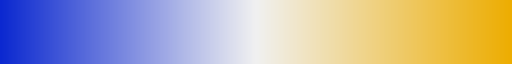

In [4]:
# Define the heatmap color
first_color = "#0B28D0"
under_color = "#F1F1F1"
over_color = "#EDAD01"
# Create a personal color map 
colors = [first_color,under_color, over_color]
n_bins = 400
cmap_name = 'custom_colormap'
heatmap_color = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
heatmap_color

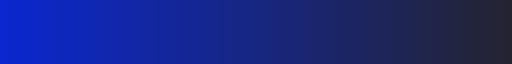

In [5]:
palette_b = sns.dark_palette("#0B28D0", reverse=True, as_cmap=True)
palette_b

In [6]:
# Colour palette for the various graphics
n_colors = 10
palette_map = sns.color_palette("dark:#0B28D0", n_colors=n_colors,as_cmap=False)
palette_map

[(0.14217064351973224, 0.14390410693260464, 0.19354284782618525),
 (0.13129638908327107, 0.14532701622135824, 0.26185663585419044),
 (0.12042213464680988, 0.14674992551011184, 0.33017042388219564),
 (0.10915951398047509, 0.1482236529877495, 0.4009239900540581),
 (0.0982852595440139, 0.1496465622765031, 0.4692377780820633),
 (0.08702263887767911, 0.15112028975414074, 0.5399913442539259),
 (0.07614838444121794, 0.15254319904289435, 0.6083051322819311),
 (0.06488576377488314, 0.154016926520532, 0.6790586984537935),
 (0.05401150933842197, 0.1554398358092856, 0.7473724864817987),
 (0.043137254901960784, 0.1568627450980392, 0.8156862745098039)]

### **0.2 - Normalisation de l'affichage des graphiques**

In [7]:
# Defines display options for rows and columns
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)

In [8]:
# Defines title formatting
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titlecolor'] = '#000'
plt.rcParams['axes.titlepad'] = 20
# Defines axis formatting
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelcolor'] = '#EDAD01'
#Defines scale formatting
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8 
plt.rcParams['xtick.color'] = '#333'
plt.rcParams['ytick.color'] = '#333'

In [9]:
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.2,
              rc={"axes.titlesize":16, 
                  "axes.labelsize":10, 
                  "xtick.labelsize":8, 
                  "ytick.labelsize":8, 
                  "xtick.color":"#333", 
                  "ytick.color":"#333", 
                  "axes.titlecolor":"#000", 
                  "axes.labelcolor":"#EDAD01"
                  })

## **1. Description des data set**
***

### **1.1 custormers**

Cet ensemble de données contient des informations sur le client et sa localisation. Chaque commande est associée à un identifiant client unique.

In [10]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
df_customers.sample(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
23752,8aba3eac72f0fb726c15140c5e7b5d5b,a1ec25928532606ff2a113ef95963c12,5729,sao paulo,SP
18970,326cd7173402f166f337b4abecbadba4,added1a2b033889698075770b7514df7,25585,sao joao de meriti,RJ


In [12]:
df_customers.isna().mean()

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

### **1.2 geolocalisation**

Ce jeu de données contient des informations sur les codes postaux brésiliens et leurs coordonnées lat/lng.

In [13]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
df_geolocation.sample(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
808609,75909,-17.793199,-50.951940,rio verde,GO
344728,14940,-21.748148,-48.835235,ibitinga,SP


In [15]:
df_geolocation.isna().mean()

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

### **1.3 order_items**

Cet ensemble de données comprend des informations sur les articles achetés lors de chaque commande.

In [16]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [18]:
df_order_items.sample(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
61737,8cda3e06e93016da7b1b99e24398d19f,1,5a4491fb73ef5c6689be17bfb30642eb,4371b634e0efc0e22b09b52907d9d469,2018-05-02 15:12:16,200.0,16.28
48350,6def446d620c67c66889bf68e0552870,1,42697582a754e573f9e3e9e78752252c,87142160b41353c4e5fca2360caf6f92,2018-06-14 16:55:10,69.0,23.06


In [19]:
df_order_items.isna().mean()

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

### **1.4 order_payments**

Cet ensemble de données comprend des données sur les options de paiement des commandes.

In [20]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [22]:
df_order_payments.sample(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
7070,ae44f114faaadcc8fdbcdda840ffee18,1,credit_card,1,160.54
17571,0a511bcdd22a725ca670b0102ac0be73,1,boleto,1,133.48


In [23]:
df_order_payments.isna().mean()

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

### **1.5 order_reviews**

Cet ensemble de données comprend des données sur les avis émis par les clients. Une fois que le client a reçu le produit il reçoit par courrier électronique une enquête de satisfaction dans laquelle il peut donner une note sur son expérience d'achat et écrire quelques commentaires.

In [24]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [26]:
df_order_reviews.sample(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
11924,26f5ca6c18637079526ad5fd2bb25066,29403a103be3d8cb0c34a1cd6a90aaaa,2,NaN,NaN,2017-04-21 00:00:00,2017-04-21 22:37:04
4303,139f28bb2ea75ecc056be3b6600719e1,31a8fcbeaa65f2a7dec1abee188ffcc9,4,NaN,NaN,2017-09-28 00:00:00,2017-09-29 22:51:24


In [27]:
df_order_reviews.isna().mean()

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

<Axes: >

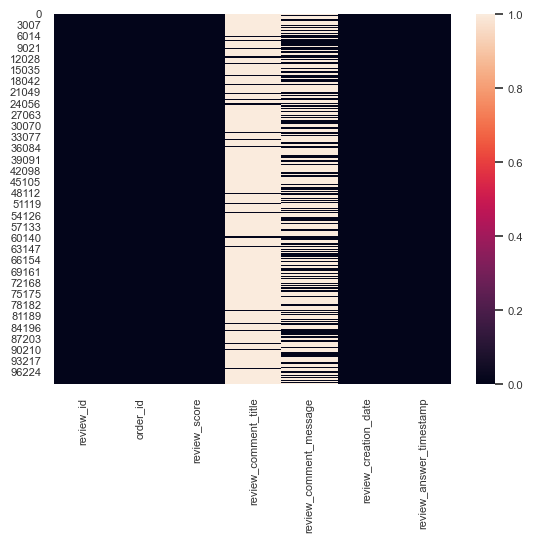

In [28]:
sns.heatmap(df_order_reviews.isna())

### **1.6 orders**

Il s'agit de l'ensemble de données de base sur chacune des commandes.

In [29]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [30]:
df_orders.sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
19171,e4f0fb907ebf79c450a8646d85c36d62,974f9c5c29d6eedcbe11b1b76ef43553,delivered,2018-02-01 16:37:28,2018-02-02 16:00:44,2018-02-06 18:37:02,2018-03-19 21:46:51,2018-02-26 00:00:00
3359,ec67500767e46c56db2d046d13e46296,6f33f93011237ac8e47e0652b5da71de,delivered,2018-02-28 09:40:36,2018-02-28 10:40:35,2018-02-28 19:56:46,2018-03-08 18:46:42,2018-03-20 00:00:00


In [31]:
df_orders.isna().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64

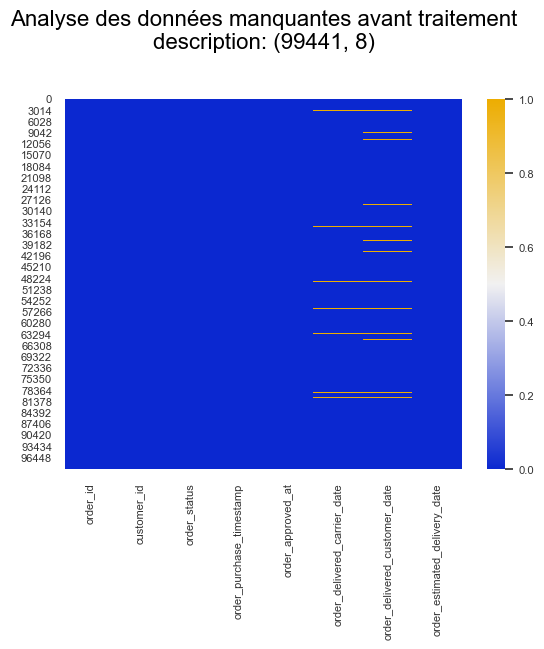

In [32]:
sns.heatmap(df_orders.isna(), cmap=heatmap_color)
# Set title on pie chart
plt.title(f"Analyse des données manquantes avant traitement\ndescription: {df_orders.shape}\n")
plt.show()

### **1.7 products**

Cet ensemble de données comprend des données sur les produits vendus par Olist.

In [33]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [35]:
df_products.sample(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
31220,a04a2402a7774ba53d10ed2ce29715e3,cama_mesa_banho,58.0,589.0,1.0,3000.0,16.0,50.0,40.0
3327,38651ca5be7f992345b0ea57bdf25719,perfumaria,41.0,634.0,1.0,113.0,16.0,4.0,19.0


In [36]:
df_products.isna().mean()

product_id                    0.000000
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64

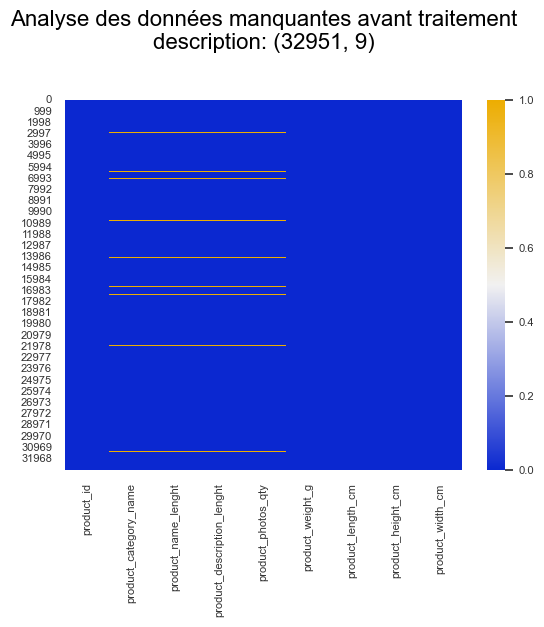

In [37]:
sns.heatmap(df_products.isna(), cmap=heatmap_color)
# Set title on pie chart
plt.title(f"Analyse des données manquantes avant traitement\ndescription: {df_products.shape}\n")
plt.show()

### **1.8 sellers**

Cet ensemble de données comprend des données sur les vendeurs qui ont honoré les commandes passées sur Olist.

In [38]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [39]:
df_sellers.sample(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1012,a8739afb32aaa45e01815ca76f76f54b,9850,sao bernardo do campo,SP
2834,4867209cb29b56b92893d7bde3ce8012,17209,jau,SP


In [40]:
df_sellers.isna().mean()

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

### **1.9 product_category_name_translation**

Traduit le nom de la catégorie de produit en anglais.

In [41]:
df_product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [42]:
df_product_category_name_translation.sample(2)

,product_category_name,product_category_name_english
27,construcao_ferramentas_jardim,costruction_tools_garden
66,flores,flowers


In [43]:
df_product_category_name_translation.isna().mean()

product_category_name            0.0
product_category_name_english    0.0
dtype: float64

## **2. Fusion & Nettoyage des data set**
***

Etant données que la segmentation des clients est l'objectif de la mission, il est nécessaire de rassembler toutes les données pertinentes pour construire une base de données clients. Ainsi, les caractéritiques en liens avec les informations clients sont nettoyées et rassemblées.

Pour commencer, les informations clients et les informations globales de commandes sont rassemblées par l'identifiant client unique de chaque commande `customer_id`.

In [44]:
df = pd.merge(df_orders, df_customers, on="customer_id", how="inner", indicator=True)

Les variables qui n'apportent pas d'informations sur les clients sont supprimées.

In [45]:
df.drop(columns=["order_status","order_approved_at","order_delivered_carrier_date",
                 "order_estimated_delivery_date","customer_state","_merge"], inplace=True)

### **2.1 order_reviews**

Certaines commandes semblent avoir reçus plusieurs commentaires.

In [46]:
df_order_reviews["order_id"].duplicated().sum()

551

Deux d'entre elles sont séléctionnées au hasard pour vérification. L'ensemble des doublons d'une commande est ensuite analysée pour une meilleure compréhension.

In [47]:
df_order_reviews[df_order_reviews["order_id"].duplicated()].sample(2, random_state=42)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
40170,d5d919cf0a4c48cf04f21bfa902c13aa,0b4aab4ef70208498663141571f68116,1,NaN,Comprei dia 8/3/18 e a entrega era até o dia 1...,2018-04-19 00:00:00,2018-04-19 22:52:26


In [48]:
df_order_reviews[df_order_reviews["order_id"] == "0b4aab4ef70208498663141571f68116"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15665,e38dd6db11598bcf498fed2c52026fe8,0b4aab4ef70208498663141571f68116,1,NaN,A compra feita dia 8/3 com previsao de entrega...,2018-04-18 00:00:00,2018-04-20 10:19:17
40170,d5d919cf0a4c48cf04f21bfa902c13aa,0b4aab4ef70208498663141571f68116,1,NaN,Comprei dia 8/3/18 e a entrega era até o dia 1...,2018-04-19 00:00:00,2018-04-19 22:52:26


Il semble qu'une commande peut faire l'objet de plusieurs envois, ce qui expliquerai la présence de plusieurs commentaires effectués à des dates différentes.

Seule l'information `review_score` est pertinente dans ce jeu de donnée, ainsi les commandes ayant fait l'objet de plusieurs notations sont fusionnées afin d'obtenir une note moyenne par commande. 

In [49]:
df_order_reviews = df_order_reviews[["order_id","review_score"]].groupby(by="order_id").mean().reset_index()

Les données sont ensuite ajoutées au data set global.

In [50]:
df = df.merge(df_order_reviews, on="order_id", how="inner")

### **2.2 order_payments**

Une commande semble pouvoir contenir différentes informations de paiements.

In [51]:
df_order_payments["order_id"].duplicated().sum()

4446

Cinq d'entre elles sont séléctionnées au hasard pour vérification. L'ensemble des doublons d'une commande est ensuite analysée pour une meilleure compréhension.

In [52]:
df_order_payments[df_order_payments["order_id"].duplicated()].sample(5, random_state=40)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
84511,bdc19e734eab622dbbd2162a226278de,2,voucher,1,45.00
73316,a37e63f75db3f7601cd0e95a5b63c083,2,voucher,1,60.00
33294,50501e525eae308e75363c0606adb973,4,voucher,1,23.70
40629,3c75044db750a89606612ed286713eb8,1,credit_card,7,74.07
93714,d03665e5fcb519e311e5609b2d0d2282,1,credit_card,1,20.75


In [53]:
df_order_payments[df_order_payments["order_id"] == "3c75044db750a89606612ed286713eb8"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
33603,3c75044db750a89606612ed286713eb8,2,voucher,1,100.00
40629,3c75044db750a89606612ed286713eb8,1,credit_card,7,74.07


L'analyse montre qu'une commande peut faire l'objet d'un paiement en plusieurs fois et que plusieurs moyens de paiement peuvent être utilisés.

Seule les variables `payment_installments` et `payment_sequential` sont pertinentes dans ce jeu de donnée. Ces données sont fusionnées afin d'obtenir le nombre total de moyen de paiement utilisés pour payer une commande ainsi que le nombre de mensualité total.

In [54]:
df_payment_installments = df_order_payments.groupby(by="order_id").sum()[["payment_installments"]].reset_index()
df_payment_sequential = df_order_payments.groupby(by="order_id").count()[["payment_sequential"]].reset_index()

In [55]:
df_order_payments = pd.merge(df_payment_installments,df_payment_sequential, on="order_id", how="inner")

Les données sont ensuite ajoutées au data set global.

In [56]:
df = df.merge(df_order_payments, on="order_id", how="inner")

### **2.3 order_items & products**

Les commandes peuvent contenir plusieurs produits.

In [57]:
df_order_items["order_id"].duplicated().sum()

13984

Les données sont regroupées afin d'obtenir le nombre de produits par commande.

In [58]:
df_count_number_product = df_order_items[["order_id","product_id"]].groupby(by="order_id").count().reset_index()

Afin d'obtenir des informations plus détaillées sur les commandes, la moyenne des données produits va être ajoutée à chaque commande.

Pour cela il est nécessaire de fusionner les données de ventes et les données produits dans un premier temps.

In [59]:
df_items_products = pd.merge(df_order_items, df_products, on="product_id", how="inner")

Ayant les dimensions de `Largeur`, de `longueur` et la `Hauteur` de chaque produits, ces informations sont condensées dans une colonne `product_volume_cm3` afin d'obtenir le volume des produits.

In [60]:
df_items_products["product_volume_cm3"] = df_items_products["product_length_cm"]*df_items_products["product_height_cm"]*df_items_products["product_width_cm"]

Les données produits sont ensuite regroupées par commandes de manière à obtenir la moyenne des prix, de poids et de volume pour chaque commande.

In [61]:
df_items_products = df_items_products[["order_id","price","freight_value","product_weight_g","product_volume_cm3"]].groupby(by="order_id").mean().reset_index()

Puis, le nombre de produit par commande précédemment calculé est ajouté au data set. Les colonnes sont ensuite renommées pour une meilleure lisibilité.

In [62]:
df_items_products = df_items_products.merge(df_count_number_product, on="order_id", how="inner")

In [63]:
df_items_products.rename(columns={"price":"average_price",
                                  "freight_value":"average_freight_value",
                                  "product_weight_g":"average_product_weight_g",
                                  "product_id":"nb_product_per_order",}, inplace=True)

Les données sont ensuite ajoutées au data set global.

In [64]:
df = df.merge(df_items_products, on="order_id", how="left", indicator=True)

Vérification de la qualité des jointures.

In [65]:
df["_merge"].value_counts()

_merge
both          97916
left_only       756
right_only        0
Name: count, dtype: int64

Il semble que certaines commandes du data set global ne soient pas référencées dans les informations produits. Il est également intéressant de noter que ces commandes n'ont pas d'informations `order_delivered_customer_date`.

In [66]:
df.loc[df["_merge"] == "left_only"]

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_zip_code_prefix,customer_city,review_score,payment_installments,payment_sequential,average_price,average_freight_value,average_product_weight_g,product_volume_cm3,nb_product_per_order,_merge
264,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,2017-11-16 15:09:28,NaN,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,1.0,5,1,NaN,NaN,NaN,NaN,NaN,left_only
579,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,2018-01-31 11:31:37,NaN,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,3.0,1,1,NaN,NaN,NaN,NaN,NaN,left_only
680,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,2017-08-14 17:38:02,NaN,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,1.0,1,1,NaN,NaN,NaN,NaN,NaN,left_only
730,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,2018-01-08 19:39:03,NaN,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,1.0,1,1,NaN,NaN,NaN,NaN,NaN,left_only
1119,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,2018-08-28 15:26:39,NaN,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,1.0,1,1,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98483,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,2018-01-16 14:27:59,NaN,a33e0969408919ba06779f497ead93ec,7025,guarulhos,1.0,1,1,NaN,NaN,NaN,NaN,NaN,left_only
98514,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,2018-08-31 16:13:44,NaN,e90598185d2427a35e32ef241a5c04aa,11075,santos,5.0,1,1,NaN,NaN,NaN,NaN,NaN,left_only
98578,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,2018-09-06 18:45:47,NaN,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,4.0,1,1,NaN,NaN,NaN,NaN,NaN,left_only
98579,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,2017-08-23 16:28:04,NaN,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,1.0,2,1,NaN,NaN,NaN,NaN,NaN,left_only


Ces commandes sont donc excluent du data set global et les colonnnes inutiles sont supprimées.

In [67]:
df = df.loc[df["_merge"] == "both"]

In [68]:
df = df.drop(columns=["customer_id","_merge"])

### **2.4 order_purchase_timestamp & order_delivered_customer_date**

Afin d'obtenir la Récence (segmentation RFM), il est nécessaire d'adapter le type des colonnes qui contiennent une date. 

In [69]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

In [103]:
# Instantiation of first and last order dates
date_first_order = df["order_purchase_timestamp"].max().date()
date_last_order = df["order_purchase_timestamp"].min().date()
# Display dates
print(f"Date de la 1ère commande: {date_first_order}")
print(f"Date de la dernière commande: {date_last_order}")

Date de la 1ère commande: 2018-09-03
Date de la dernière commande: 2016-09-04


La colonne `days_since_last_order` est ensuite crée pour contenir la Récence (en nombre de jours) de chaque commande.

In [118]:
# Calculate the number of days elapsed
df['days_since_last_order'] = (df["order_purchase_timestamp"].max() - df['order_purchase_timestamp']).dt.days

### **2.5 Customers data set**

Les données sont maintenant traitées de manières à obtenir une informations par client et non plus par commande.

Dans un premier temps, le nombre de commande par client est calculé, la colonne correspondante est renommée et le type est modifié pour correspondre aux données.

In [ ]:
df_nb_orders_per_customer = df.groupby(by="customer_unique_id").count()[["order_id"]].reset_index()
df_nb_orders_per_customer.rename(columns={"order_id":"nb_orders_per_customer"}, inplace=True)

In [ ]:
df_nb_orders_per_customer["nb_orders_per_customer"] = df_nb_orders_per_customer["nb_orders_per_customer"].astype(float)

Une copie du data set est effectuée pour l'utilisation ultérieure des données de géolocalisation. Ces données sont ensuite supprimées pour finaliser la construction du jeu de données client. 

In [ ]:
# Instanciation du jeu de données de géolocalisation
df_geo = df.copy()

In [ ]:
df.drop(columns=["order_purchase_timestamp","order_delivered_customer_date","customer_zip_code_prefix","customer_city"], inplace=True)

Enfin, les commandes sont aggrégées par la moyenne pour chaque client et l'information du nombre de commandes par client est ajoutée au data set.

In [ ]:
df = df.drop(columns="order_id").groupby(by="customer_unique_id").mean().reset_index()

In [ ]:
df = df.merge(df_nb_orders_per_customer, on="customer_unique_id", how="left")

Vérification de la proportion de client ayant effectué plusieurs commandes.

In [ ]:
# Calculation of the average percentage of missing values
more_than_one_order = (len(df[df["nb_orders_per_customer"] > 1]))
# Calculation of the proportion of non-missing values
one_order = len(df) - more_than_one_order

# Data for pie chart
data = [one_order, more_than_one_order]
labels = ["Client = 1 commandes", "Client > 1 commandes"]
# Define color code
colors = ["#0B28D0",'#EDAD01']

# Create pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    data, labels=labels,
    startangle=90, colors=colors, autopct="%1.1f%%",
    wedgeprops = {"linewidth": 2, "edgecolor": "white"})
# Set title on pie chart
plt.title(f"Proportion de clients par nombre de commande\ndescription: {df.shape}")
# Customise label colours and sizes
plt.setp(texts + autotexts, color="#333", fontsize=10)
plt.setp(autotexts, color="white")
# Pie chart display
plt.axis("equal")
plt.show()

### **2.6 Données manquantes**

Analyse des données manquantes.

In [ ]:
df.isna().mean()

Analyse de la répartition des données manquantes.

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isna(), cmap=heatmap_color)
# Set title on pie chart
plt.title(f"Analyse des données manquantes avant traitement\ndescription: {df_products.shape}\n")
plt.show()

Seul les individus contenants des valeurs manquantes sont supprimées.

In [ ]:
df_customers = df.dropna()

## **3. Fusion & Nettoyage des données de géolocalistion**
***

L'ajout des données de geolocalisation augmente considérablement la taille du data set. Cela est dû à la présence de différentes `geolocation_lat` et `geolocation_lng` pour un même code postale, ce qui est normal puisqu'il existe plusieurs lieux dans une même zone geographique.

Ce référencement précis n'est pas pertinent pour la mission. Ainsi, une seule information de `geolocation_lat` et `geolocation_lng` est sélectionnée aléatoirement par `geolocation_zip_code_prefix`.

In [ ]:
df_geolocation = df_geolocation.groupby('geolocation_zip_code_prefix').sample(n=1)

La même démarche est effectuée avec la ville puisque la démarche de nettoyage révèle que certains codes postaux ne se trouvent pas dans le data set client, alors que certaines villes s'y trouvent. Cette démarche sert donc à optimer la qualité des jointures et donc à minimiser la perte d'information.

In [ ]:
df_city = df_geolocation.groupby('geolocation_city').sample(n=1)

Les données de géolocalisation du `df_geo` sont isolées puis fusionnées au `df_city`.

In [ ]:
df_geo = df_geo[["customer_unique_id","customer_zip_code_prefix","customer_city"]]

In [ ]:
df_geo = df_geo.merge(df_city, left_on=["customer_city"], right_on=["geolocation_city"], how="left", indicator=True)

In [ ]:
df_geo["_merge"].value_counts()

Une part des individus contient des noms de villes qui ne figurent pas dans le data set de géolocalisation. Ils sont isolés dans `df_geo_left` afin de trouver une correspondance avec le code postal. 

In [ ]:
df_geo_left = df_geo[df_geo["_merge"] == "left_only"].drop(columns=["geolocation_zip_code_prefix","geolocation_lat","geolocation_lng","geolocation_city","geolocation_state","_merge"])

Les données correctement jointent sont elles aussi isolées dans le data set de géolocalisation final (`df_geo`) et les colonnes inutiles sont supprimées.

In [ ]:
df_geo = df_geo[df_geo["_merge"] == "both"].drop(columns=["geolocation_zip_code_prefix","geolocation_city","geolocation_state","_merge"])

Les données `df_geo_left` sont maintenant jointent au données de géolocalisation via le code poastal.

In [ ]:
df_geo_left = df_geo_left.merge(df_geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left", indicator=True)

La qualité des jointures montre que l'information de geolocalisation a trouvé une correspondance pour 1179 individus, ce qui diminue significativement la perte d'information de géolocalisation à propos des clients. 

In [ ]:
df_geo_left["_merge"].value_counts()

Les colonnes inutiles sont maintenant supprimées du `df_geo_left`.

In [ ]:
df_geo_left.drop(columns=["geolocation_zip_code_prefix","geolocation_city","geolocation_state","_merge"], inplace=True)

Les data sets sont maintenant concatener pour ne former qu'un data set `df_geo` qui contient l'ensemble des informations de géolocalisation des clients. Les 49 individus n'ayant pas trouver de correspondance sont ensuite supprimés

In [ ]:
df_geo = pd.concat([df_geo, df_geo_left])

In [ ]:
df_geo.dropna(inplace=True)

## **4. Analyse des données**
***

### **4.1 Géolocalisation des clients**

In [ ]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='i')

In [ ]:
plt.figure(figsize=(14,10))
map.scatter(df_geo['geolocation_lng'], df_geo['geolocation_lat'], latlon=True, color='red')
map.drawcoastlines()
map.drawcountries()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.scatter(df_geo['geolocation_lng'], df_geo['geolocation_lat'], transform=ccrs.PlateCarree())
plt.show()


In [ ]:
import pandas as pd
import altair as alt

# Prepare DataFrame
df = pd.DataFrame({
    'zip_code': df_geo['customer_zip_code_prefix'],
    'latitude': df_geo['geolocation_lat'],
    'longitude': df_geo['geolocation_lng']
})

# Create chart
alt.data_transformers.disable_max_rows()

chart = alt.Chart(df).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='leading digit:N',
    tooltip='zip_code:N'
).project(
    type='identity'
).properties(
    width=650,
    height=400
)

chart.display()

### **4.2 Données clients**

#### **4.2.1 Information globale**

In [ ]:
df_customers.info()

#### **4.2.2 Mesures de tendance centrale et de dispersion**

In [ ]:
df_customers.describe()

#### **4.2.3 Mesures de concentration**

A FAIRE

#### **4.2.4 Analyse des distributions + Mesures de forme**

In [ ]:
# Generates graphs by variable
for col in df_customers.select_dtypes("float"):
    fig, axs = plt.subplots(1, 3, figsize=(16,4))

    # Calculate skewness and kurtosis
    skewness = round(df_customers[col].skew(), 2)
    kurtosis = round(df_customers[col].kurtosis(), 2)

    # Display histogram
    sns.histplot(data=df_customers, x=df_customers[col], kde="kind", color="#0b28d0", ax=axs[0])
    # Add skewness and average to legend
    axs[0].legend([f"Skewness: {skewness}", f"Kurtosis: {kurtosis}"], fontsize="10", handlelength=0, handletextpad=0)
    # Create a boxplot
    sns.boxplot(data=df_customers, x=df_customers[col], orient="h", color="#0b28d0", ax=axs[1])
    # Create a violinplot
    sns.violinplot(data=df_customers, x=df_customers[col], orient="h", color="#0b28d0", ax=axs[2])
    
    # Add a unique title for each target
    plt.suptitle(f"Distribution de {col}", color="#000")
    plt.tight_layout()

#### **4.2.5 Analyse bivariée**

In [ ]:
sns.pairplot(df_customers, corner=True, plot_kws={'s': 6, 'color': '#0b28d0'}, diag_kws= {'color': '#0b28d0'})
plt.show()

#### **4.2.6 Recherche des corrélations**

In [ ]:
# Digital DF for correlation analysis
df_corr = df_customers.select_dtypes(include=['float64', 'int64'])

# Analysis of correlations between variables
plt.figure(figsize=(12,4))
sns.heatmap(df_corr.corr(method="spearman"), center=0, cmap=heatmap_color, annot=True, annot_kws={'size': 9})
plt.title('Analyse de corrélation entre les indicateurs numériques\n(r de Spearman)')
plt.show()

### **4.3 ACP**

Suppression de la colonne non numérique et description du data set avant l'ACP.

In [ ]:
df_acp = df_customers.drop(columns="customer_unique_id")

In [ ]:
print(df_acp.shape)
# Number of observations (tuples/country)
n = df_acp.shape[0]
# Number of variables (columns)
p = df_acp.shape[1]

#### **4.3.1 Normalisation des données**

Les données sont centrées et réduites (moyenne=0; Ecart-type=1).

In [ ]:
# Instanciation
sc = StandardScaler()
# Transformation - Scaling 
X = sc.fit_transform(df_acp)

Les composantes principales sont calculées et instanciées dans la variables `coord`. Le nombre de composante est affiché.

In [ ]:
# Instanciation
acp = PCA(svd_solver='full')
#Calculs des composantes principales + renvoie en sortie les coordonnées factorielles
coord = acp.fit_transform(X)
#Nombre de composantes calculées
print(acp.n_components_)

#### **3.3   Eboulis des valeurs propres**

##### **3.3-1   Calcul des valeurs propres**

Affiche la variance expliquée pour chaque composante principale.

In [ ]:
print(acp.explained_variance_)

Calcule la valeur propre corrigée pour chaque composante principale. Cette valeur s'obtient en divisant la variance expliquée par chaque composante par les degrés de liberté.

La valeur propre corrigée est une mesure de la variance expliquée pour chaque composante, qui est adaptée pour les degrés de liberté. Elle permet de comprendre la distribution de la variance expliquée et à déterminer combien de composantes principales sont nécessaires pour expliquer une proportion significative de la variance.

In [ ]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

Calcule la racine carrée de la valeur propre corrigée afin de comprendre la distribution de la variance expliquée et à déterminer combien de composantes principales sont nécessaires pour expliquer une proportion significative de la variance.

In [ ]:
sqrt_eigval = np.sqrt(eigval)
print(sqrt_eigval)

Calcule la corrélation de chaque variable avec chaque composante principale. Cela permet de comprendre comment les variables originales sont liées aux composantes principales et à déterminer les relations entre les variables.

In [ ]:
# Correlation of variables with axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#Displays the variable x factor correlation matrix
print(corvar)

##### **3.3-2   Eboulis des valeurs**

Déclaration de la fonction pour l'éboulis des valeurs propres et analyse des résultats.

In [ ]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree, color='#0b28d0')
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="#edad01",marker='o')
    plt.title("Eboulis des valeurs propres\n", fontsize=18, color='#0b28d0')
    plt.xlabel("Rang de l'axe d'inertie", color='#edad01')
    plt.ylabel("% d'inertie", color='#edad01')
    plt.xticks(color='#333')
    plt.yticks(color='#333')
    plt.show(block=False)

In [ ]:
#Eboulis des valeurs propres
plt.figure(figsize=(14,4))
display_scree_plot(acp)

Les résultats montrent que `review_score` est l'information qui contribue le plus à l'inertie totale. 

Les 8 premières composantes suffisent à expliquer près de 90% de l'information.

In [ ]:
print(pd.DataFrame({'Ratio':acp.explained_variance_ratio_*100,'Composante Principale':df_acp.columns}))

#### **3.4   Représentation des individus - 1er Plan Factoriel**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(14,10))

# 1er plan factoriel
scatter1 = axs[0, 0].scatter(x=coord[:, 0], y=coord[:, 1], c=df_customers.nb_orders_per_customer, s=6)
axs[0, 0].set_title("1er plan factoriel")
fig.colorbar(scatter1, ax=axs[0, 0])

# 2e plan factoriel
scatter2 = axs[0, 1].scatter(x=coord[:, 2], y=coord[:, 3], c=df_customers.nb_orders_per_customer, s=6)
axs[0, 1].set_title("2e plan factoriel")
fig.colorbar(scatter2, ax=axs[0, 1])

# 3e plan factoriel
scatter3 = axs[1, 0].scatter(x=coord[:, 4], y=coord[:, 5], c=df_customers.nb_orders_per_customer, s=6)
axs[1, 0].set_title("3e plan factoriel")
fig.colorbar(scatter3, ax=axs[1, 0])

# 4e plan factoriel
scatter4 = axs[1, 1].scatter(x=coord[:, 6], y=coord[:, 7], c=df_customers.nb_orders_per_customer, s=6)
axs[1, 1].set_title("4e plan factoriel")
fig.colorbar(scatter4, ax=axs[1, 1])

plt.tight_layout()
plt.show()

#### **3.5   Cercle des corrélations**

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16,16)) # Création de la grille de 2x2

# Liste des axes
axes = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]

for i, ax in enumerate(axes):
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    
    # Affichage des étiquettes (noms des variables)
    for j in range(p):
        ax.annotate(df_acp.columns[j],(corvar[j,2*i]+0.03,corvar[j,2*i+1]+0.03), size="10", color="#333")
        ax.arrow(0,0, corvar[j,2*i],corvar[j,2*i+1], head_width=0.02, color='#edad01')
        
    # Ajout des axes
    ax.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
    ax.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

    ax.set_title(f"Composante principale {2*i} et {2*i+1}")
    
    # Ajout du cercle
    cercle = plt.Circle((0,0),1,color='#0b28d0',fill=False)
    ax.add_artist(cercle)

# Affichage
plt.show()

In [ ]:
pcs = acp.components_

plt.figure(figsize=(10,8))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='#edad01')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, df_customers.columns[i], fontsize='10', color="#333")


# Afficher une ligne horizontale y=0
plt.plot([-0.2, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.2, 0.7])
plt.ylim([-0.7, 0.7])

plt.show()

In [ ]:
path_customers = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P5_Segmentez_Des_Clients_Dun_Site_e_commerce/df_final.csv"
df_customers.to_csv(path_customers, sep=",", index=False)

---


* OK - Ajouter recense (mesurer depuis quand le client n'a pas commander)
* OK - RFM (Recense/Frequence d'achat/Monnaie Value)
* OK - ACP (Observer l'ensemble des plans)
* Kmeans (description métier des cluster, boxplot, scatter), cluster 1 client qui dépensent beaucoup, cluster 2 les petits achetrys. 
* CAH
* DBSCAN


Appliquer powertransformer ou quantiletransformer 

Utiliser silouhette et comparer avec davies bouldin

Tester un nombre de cluster supérieur pour la curiosité